# CrowdTruth for Sparse Multiple Choice Tasks: Event Extraction


In [1]:
import pandas as pd
file_name = "f1321550_events_nonemotivation"
test_data = pd.read_csv("../../data/pilot_crowd_data/raw_data/" + file_name + ".csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,gold_total_events,hiddeninput_gold,lowercase_sentence,notpossible_gold,original_sentence,processed_sentence,selectedtags_desc_gold,sentence,sentence_id,tokens
0,2015653294,11/19/2018 08:03:43,4261027423,11/19/2018 08:03:23,False,clixsense,1.0,914e84bd6efb46bebf8bd06e64b27ea7,USA,NaN,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
1,2015653294,11/19/2018 08:48:10,4261079076,11/19/2018 08:47:47,False,elite,1.0,19d1cf4672a44a2b873901990979111a,USA,TX,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
2,2015653294,11/19/2018 11:48:14,4261290950,11/19/2018 11:47:30,False,instagc,1.0,1f2407ac6926cfdf579fa829a88c1d86,USA,AL,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
3,2015653294,11/19/2018 12:25:08,4261335644,11/19/2018 12:21:43,False,instagc,1.0,8d2c1b1e71575f97daec7742b3dc915a,USA,NaN,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
4,2015653294,11/19/2018 12:30:43,4261342637,11/19/2018 12:30:15,False,clixsense,1.0,d318abc9ba19dbb88876c8ff5637f787,USA,OH,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [2]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Relation Extraction task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of all relations that were given as input to the crowd in at least one sentence
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [3]:
class TestConfig(DefaultConfig):
    inputColumns = ["doc_id", "total_events_gold", "sentence", "lowercase_sentence", "sentence_id", "all_runs_events"]
    outputColumns = ["selectedtags_desc"]
    
    annotation_separator = ","
        
    # processing of a closed task
    open_ended_task = True
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [4]:
data_open, config = crowdtruth.load(
    file = "../../data/pilot_crowd_data/raw_data/" + file_name + ".csv",
    config = TestConfig()
)

data_open['judgments'].head()

,output.selectedtags_desc,output.selectedtags_desc.count,output.selectedtags_desc.unique,unit,worker,started,submitted,duration,job
judgment,,,,,,,,,
4261027423,"{'investigation__83__96': 1, 'campaign__266__2...",2,2,2015653294,914e84bd6efb46bebf8bd06e64b27ea7,2018-11-19 08:03:23,2018-11-19 08:03:43,20,../../data/pilot_crowd_data/raw_data/f1321550_...
4261079076,"{'face__69__73': 1, 'investigation__83__96': 1...",3,3,2015653294,19d1cf4672a44a2b873901990979111a,2018-11-19 08:47:47,2018-11-19 08:48:10,23,../../data/pilot_crowd_data/raw_data/f1321550_...
4261290950,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",4,4,2015653294,1f2407ac6926cfdf579fa829a88c1d86,2018-11-19 11:47:30,2018-11-19 11:48:14,44,../../data/pilot_crowd_data/raw_data/f1321550_...
4261335644,"{'investigation__83__96': 1, 'campaign__266__2...",2,2,2015653294,8d2c1b1e71575f97daec7742b3dc915a,2018-11-19 12:21:43,2018-11-19 12:25:08,205,../../data/pilot_crowd_data/raw_data/f1321550_...
4261342637,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",5,5,2015653294,d318abc9ba19dbb88876c8ff5637f787,2018-11-19 12:30:15,2018-11-19 12:30:43,28,../../data/pilot_crowd_data/raw_data/f1321550_...


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [5]:
results_open = crowdtruth.run(data_open, config)

`results` is a dict object that contains the quality metrics for sentences, events and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [6]:
results_open["units"].head()

,duration,input.all_runs_events,input.doc_id,input.lowercase_sentence,input.sentence,input.sentence_id,job,output.selectedtags_desc,output.selectedtags_desc.annotations,output.selectedtags_desc.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,
2015653294,55.65,informed__37__45###face__69__73###investigatio...,nyt_20130321_sarkozy,former president nicolas sarkozy was informed ...,Former President Nicolas Sarkozy was informed ...,0,../../data/pilot_crowd_data/raw_data/f1321550_...,"{'investigation__83__96': 14, 'campaign__266__...",67,6,20,0.615667,"{'investigation__83__96': 0.7905573421453503, ...",0.542161,"{'investigation__83__96': 0.7, 'campaign__266_..."
2015653295,43.00,denied__16__22###accepting__23__32###alleged__...,nyt_20130321_sarkozy,mr. sarkozy has denied accepting illegal campa...,Mr. Sarkozy has denied accepting illegal campa...,1,../../data/pilot_crowd_data/raw_data/f1321550_...,"{'campaign__41__49': 9, 'denied accepting__16_...",51,5,20,0.513601,"{'campaign__41__49': 0.47151676184808683, 'den...",0.453601,"{'campaign__41__49': 0.45, 'denied accepting__..."
2015653296,42.10,called__41__47###decision__61__69###indicates_...,nyt_20130321_sarkozy,"mr. sarkozy s lawyer , thierry herzog , called...","Mr. Sarkozy 's lawyer , Thierry Herzog , calle...",2,../../data/pilot_crowd_data/raw_data/f1321550_...,"{'decision__61__69': 9, 'believes__103__111': ...",66,6,20,0.578046,"{'decision__61__69': 0.4887499740918645, 'beli...",0.508543,"{'decision__61__69': 0.45, 'believes__103__111..."
2015653297,45.20,said__11__15###appeal__25__31###appeal .__25__33,nyt_20130321_sarkozy,the lawyer said he would appeal 0,The lawyer said he would appeal .,3,../../data/pilot_crowd_data/raw_data/f1321550_...,"{'appeal__25__31': 14, 'said__11__15': 13, 'ap...",30,3,20,0.651928,"{'appeal__25__31': 0.7553968436585752, 'said__...",0.599071,"{'appeal__25__31': 0.7, 'said__11__15': 0.65, ..."
2015653298,42.60,ruling__4__10###mean__32__36###lost__60__64###...,nyt_20130321_sarkozy,the ruling does not necessarily mean that mr. ...,The ruling does not necessarily mean that Mr. ...,4,../../data/pilot_crowd_data/raw_data/f1321550_...,"{'ruling__4__10': 12, 'bid__81__84': 8, 'lost_...",61,6,20,0.610223,"{'ruling__4__10': 0.7160306463723343, 'bid__81...",0.529993,"{'ruling__4__10': 0.6, 'bid__81__84': 0.4, 'lo..."


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

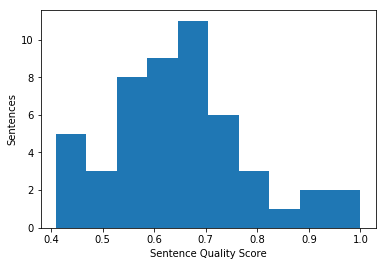

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results_open["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")


The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [8]:
results_open["units"]["unit_annotation_score"].head(10)

unit
2015653294    {'investigation__83__96': 0.7905573421453503, ...
2015653295    {'campaign__41__49': 0.47151676184808683, 'den...
2015653296    {'decision__61__69': 0.4887499740918645, 'beli...
2015653297    {'appeal__25__31': 0.7553968436585752, 'said__...
2015653298    {'ruling__4__10': 0.7160306463723343, 'bid__81...
2015653299    {'accused__23__30': 0.7847267354824691, 'fakin...
2015653300    {'missing__66__73': 0.6698163873142622, 'repor...
2015653301    {'search__31__37': 0.7437554394222453, 'speedi...
2015653302    {'pulled__32__38': 0.5691142294481945, 'showed...
2015653303    {'no_event': 0.03882365592732727, 'started__10...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [9]:
results_open["workers"].head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
017bbee01ff77eadfca65e4067b36da3,24,24,1,16.041667,0.416369,0.589989,0.705723,0.335095,0.510398,0.656537
07fe811ad57531a29d0ce82daedb4ad7,5,5,1,168.000000,0.302037,0.481093,0.627814,0.258734,0.429706,0.602119
1278d048db9733b5f2edcec989861c6a,39,39,1,21.051282,0.392047,0.575887,0.680771,0.338634,0.517208,0.654735
19d1cf4672a44a2b873901990979111a,50,50,1,26.720000,0.387568,0.571866,0.677725,0.330637,0.511078,0.646941
1f2407ac6926cfdf579fa829a88c1d86,50,50,1,53.080000,0.627702,0.725301,0.865438,0.562426,0.663426,0.847761


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

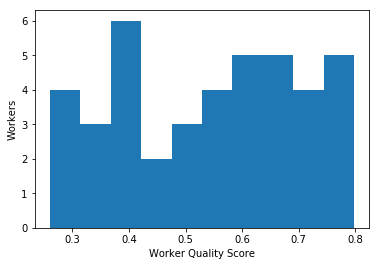

In [10]:
plt.hist(results_open["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

## Save crowd results in a csv file

In [11]:
rows = []
header = list(results_open["units"])
header.extend(["validated_event", "no_of_annotations", "validated_event_final_score", "validated_event_initial_score"])

rows.append(header)

for i in range(len(results_open["units"].index)):
    keys = []
    all_event_runs = results_open["units"]["input.all_runs_events"].iloc[i].lower().split("###")
    keys.extend(all_event_runs)
    keys.append("no_event")
    
    for j in range(len(keys)):
        row = list(results_open["units"].iloc[i])
        row.append(keys[j])
        row.append(results_open["units"]["output.selectedtags_desc"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score_initial"].iloc[i][keys[j].lower()])
    
        rows.append(row)
        
        
import csv

with open('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

## Comparison with Expert Annotations

In [12]:
# expert annotations in TempEval-3 Platinum dataset
import numpy as np
           
expert_data = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_events.csv")
crowd_data = pd.read_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv")
crowd_data["Experts"] = pd.Series(np.random.randn(len(crowd_data.index)), index=crowd_data.index)

for i in range(len(crowd_data.index)):
    subset = expert_data[(expert_data["Doc Id"].str.lower() == crowd_data["input.doc_id"].iloc[i].lower()) & (expert_data["Sentence Id"] == crowd_data["input.sentence_id"].iloc[i])]# & (str(str(expert_data["Lowercase Token"]) + "__" + str(expert_data["Start Offset"]) + "__" + str(expert_data["End Offset"])) == str(crowd_data["validated_event"].iloc[i]))]
    found = False
    for j in range(len(subset.index)):
        if str(str(subset["Lowercase Token"].iloc[j]) + "__" + str(subset["Start Offset"].iloc[j]) + "__" + str(subset["End Offset"].iloc[j])) == crowd_data["validated_event"].iloc[i]:
            found = True
    if found == True:
        crowd_data["Experts"].iloc[i] = 1
    else:
        crowd_data["Experts"].iloc[i] = 0
crowd_data.to_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv", index=False)    


/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
import eval_crowd_results as eval_script
import pandas as pd
import csv
crowd = pd.read_csv('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv')
eval_file = eval_script.compute_crowd_performance(crowd, "validated_event_final_score")
     
with open('../../data/pilot_crowd_data/results/eval_' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(eval_file)
    
eval_main = pd.read_csv("../../data/pilot_crowd_data/results/eval_" + file_name + "_units_open.csv")
eval_main

,Thresh,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-score
0,0.05,162,51,48,0,0.771429,1.000000,0.816092,0.870968
1,0.10,162,53,46,0,0.778846,1.000000,0.823755,0.875676
2,0.15,162,54,45,0,0.782609,1.000000,0.827586,0.878049
3,0.20,159,57,42,3,0.791045,0.981481,0.827586,0.876033
4,0.25,156,60,39,6,0.800000,0.962963,0.827586,0.873950
5,0.30,154,61,38,8,0.802083,0.950617,0.823755,0.870056
6,0.35,150,66,33,12,0.819672,0.925926,0.827586,0.869565
7,0.40,144,73,26,18,0.847059,0.888889,0.831418,0.867470
8,0.45,139,76,23,23,0.858025,0.858025,0.823755,0.858025
9,0.50,122,79,20,40,0.859155,0.753086,0.770115,0.802632
